#### Stephen Coates
November 5, 2024
Question 4 - how many Man City players have scored at least one goal

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
url='https://fbref.com/en/squads/b8fd03ef/2023-2024/Manchester-City-Stats'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [4]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202411012" rel="dns-prefetch"/>
  <script>
   /* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
  </script>
  <script src="https://cmp.osano.com/16CGnCU

bs4.BeautifulSoup

In [5]:
player_list = [ ]
stats_table = soup.find(class_='stats_table').tbody
stats_table

<tbody> <tr><th class="left" csk="Rodri" data-append-csv="6434f10d" data-stat="player" scope="row"><a href="/en/players/6434f10d/Rodri">Rodri</a></th><td class="left poptip" data-stat="nationality" data-tip="NT"><a href="/en/country/ESP/Spain-Football"><span style="white-space: nowrap"><span class="f-i f-es" style="">es</span> ESP</span></a></td><td class="center" csk="3.0" data-stat="position">MF</td><td class="center" data-stat="age">27</td><td class="right group_start" data-stat="games">34</td><td class="right" data-stat="games_starts">34</td><td class="right" csk="2931" data-stat="minutes">2,931</td><td class="right" data-stat="minutes_90s">32.6</td><td class="right group_start" data-stat="goals">8</td><td class="right" data-stat="assists">9</td><td class="right" data-stat="goals_assists">17</td><td class="right" data-stat="goals_pens">8</td><td class="right iz" data-stat="pens_made">0</td><td class="right iz" data-stat="pens_att">0</td><td class="right" data-stat="cards_yellow">8<

In [10]:
player_list = [ ]
stats_table = soup.find(class_='stats_table').tbody
#print(stats_table)
for row in stats_table.find_all('tr'):
    player = row.find(attrs={'data-stat':'player','scope':'row'}).text
    #print(player)
    position = row.find(attrs={'data-stat':'position'}).text
    games = row.find(attrs={'data-stat':'games_starts'}).text
    min_played = row.find(attrs={'data-stat':'minutes'}).text
    goals = row.find(attrs={'data-stat':'goals'}).text
    assists = row.find(attrs={'data-stat':'assists'}).text
    player_list.append({'player':player,'position': position, 'goals': goals, 'assists': assists, 'games': games, 'min_played': min_played})
print(player_list)

manchester_qu4_player_df = pd.DataFrame(player_list)

[{'player': 'Rodri', 'position': 'MF', 'goals': '8', 'assists': '9', 'games': '34', 'min_played': '2,931'}, {'player': 'Phil Foden', 'position': 'FW,MF', 'goals': '19', 'assists': '8', 'games': '33', 'min_played': '2,857'}, {'player': 'Ederson', 'position': 'GK', 'goals': '0', 'assists': '0', 'games': '33', 'min_played': '2,785'}, {'player': 'Julián Álvarez', 'position': 'MF,FW', 'goals': '11', 'assists': '8', 'games': '31', 'min_played': '2,647'}, {'player': 'Kyle Walker', 'position': 'DF', 'goals': '0', 'assists': '4', 'games': '30', 'min_played': '2,767'}, {'player': 'Bernardo Silva', 'position': 'MF,FW', 'goals': '6', 'assists': '9', 'games': '29', 'min_played': '2,578'}, {'player': 'Erling Haaland', 'position': 'FW', 'goals': '27', 'assists': '5', 'games': '29', 'min_played': '2,552'}, {'player': 'Rúben Dias', 'position': 'DF', 'goals': '0', 'assists': '0', 'games': '28', 'min_played': '2,559'}, {'player': 'Manuel Akanji', 'position': 'DF,MF', 'goals': '2', 'assists': '0', 'games'

In [17]:
manchester_qu4_player_df

,player,position,goals,assists,games,min_played
0,Rodri,MF,8.0,9.0,34,"2,931"
1,Phil Foden,"FW,MF",19.0,8.0,33,"2,857"
2,Ederson,GK,0.0,0.0,33,"2,785"
3,Julián Álvarez,"MF,FW",11.0,8.0,31,"2,647"
4,Kyle Walker,DF,0.0,4.0,30,"2,767"
5,Bernardo Silva,"MF,FW",6.0,9.0,29,"2,578"
6,Erling Haaland,FW,27.0,5.0,29,"2,552"
7,Rúben Dias,DF,0.0,0.0,28,"2,559"
8,Manuel Akanji,"DF,MF",2.0,0.0,28,"2,511"
9,Joško Gvardiol,DF,4.0,1.0,26,"2,328"


In [37]:
manchester_qu4_player_df.goals.sum()

94.0

In [36]:
manchester_qu4_player_df.describe()

,goals,assists,games
count,25.000000,25.000000,25.00000
mean,3.760000,2.760000,16.72000
std,6.527378,3.631804,12.74598
min,0.000000,0.000000,0.00000
25%,0.000000,0.000000,5.00000
50%,1.000000,1.000000,16.00000
75%,4.000000,5.000000,29.00000
max,27.000000,10.000000,34.00000


In [50]:
# drop players who have no playing time

manchester_qu4_player_df.drop(manchester_qu4_player_df[manchester_qu4_player_df['games'] == '0'].index, inplace=True)

# drop players who are goalkeepers

manchester_qu4_player_df.drop(manchester_qu4_player_df[manchester_qu4_player_df['position'] == 'GK'].index, inplace=True)

In [51]:
manchester_qu4_player_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player      23 non-null     object 
 1   position    23 non-null     object 
 2   goals       23 non-null     float64
 3   assists     23 non-null     float64
 4   games       23 non-null     int64  
 5   min_played  23 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.3+ KB


In [52]:
manchester_qu4_player_df.replace({'MF,FW':'FW,MF'}, inplace=True)

In [53]:
sns.set()

Text(0.5, 1.0, 'Leading Scorer has 27 goals')

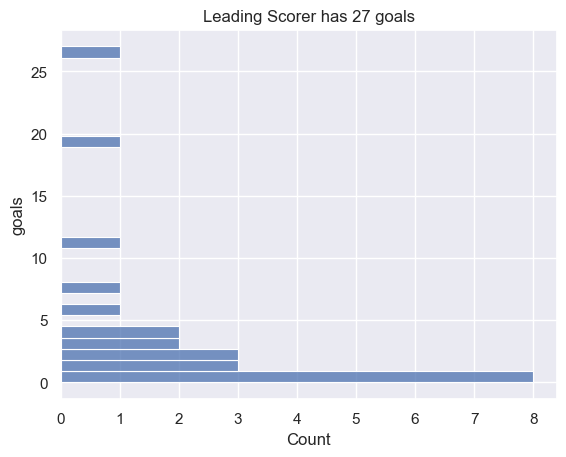

In [54]:
sns.histplot(y = 'goals', data=manchester_qu4_player_df, bins=30)
plt.title('Leading Scorer has 27 goals')

Text(0.5, 1.0, 'Shows goals scored by position')

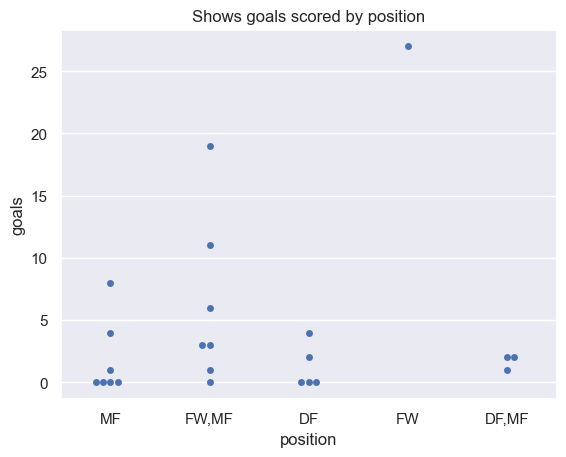

In [55]:
sns.swarmplot(x = manchester_qu4_player_df.position, y = manchester_qu4_player_df.goals)
plt.title('Shows goals scored by position')

<Axes: xlabel='assists', ylabel='goals'>

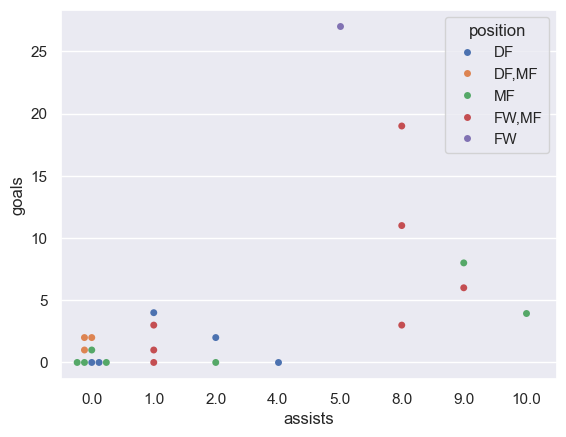

In [56]:
sns.swarmplot(x = 'assists', y = 'goals', hue = 'position', data = manchester_qu4_player_df)

Text(0.5, 1.0, 'Defenders do not have many assists or goals')

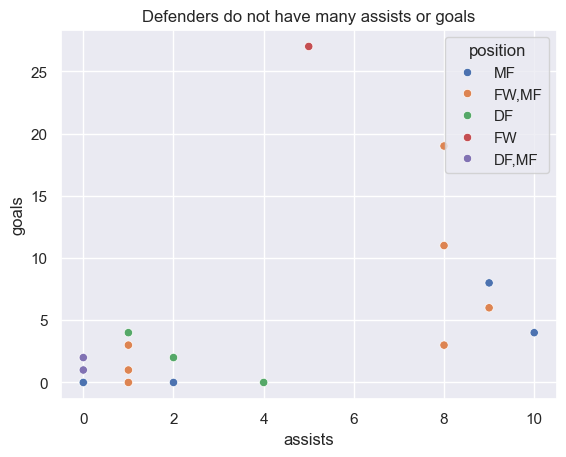

In [58]:
sns.scatterplot(x = 'assists', y = 'goals', hue = 'position', data = manchester_qu4_player_df)
plt.title('Defenders do not have many assists or goals')

<Axes: xlabel='position', ylabel='goals'>

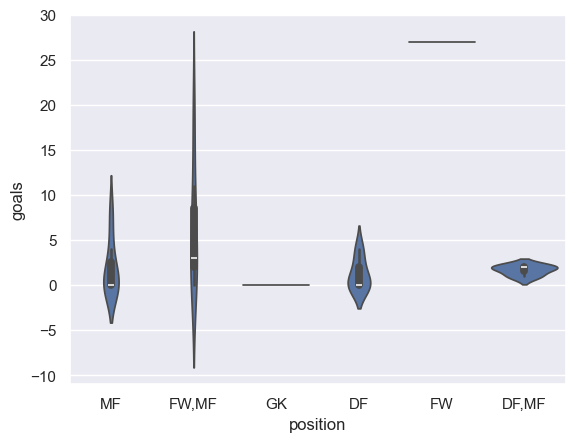

In [25]:
sns.violinplot(x = manchester_qu4_player_df.position, y = manchester_qu4_player_df.goals)